### Machine learning ex 3

#### dataset

In [1]:
%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10

In [2]:
% X 5000*400, u 5000*1
load('ex3data1.mat'); % training data stored in arrays X, y

In [3]:
fprintf('size X %d %d, size y = %d %d\n',size(X), size(y));
m = size(X, 1);

size X 5000 400, size y = 5000 1


In [4]:
% Randomly select 100 data points to display
rand_indices = randperm(m);

In [5]:
sel = X(rand_indices(1:100), :);

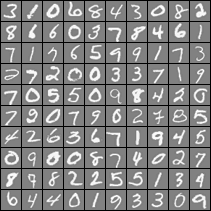

In [6]:
graphics_toolkit ('gnuplot');
displayData(sel);

In [7]:
% Test case for lrCostFunction
theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;

In [8]:
fprintf('size X_t = %d %d\n',size(X_t))
fprintf('size y_t = %d %d\n',size(y_t))

size X_t = 5 4
size y_t = 5 1


#### logistic regression cost function

In [9]:
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

In [10]:
fprintf('J = %f, grad = %f %f %f %f\n',J, grad)

J = 2.534819, grad = 0.146561 -0.548558 0.724722 1.398003


#### Part 2b: One-vs-All Training

In [11]:
lambda = 0.1;

In [12]:
[all_theta] = oneVsAll(X, y, num_labels, lambda);

Iteration    50 | Cost: 1.393408e-02
Iteration    50 | Cost: 5.725244e-02
Iteration    50 | Cost: 6.370451e-02
Iteration    50 | Cost: 3.584608e-02
Iteration    50 | Cost: 6.184004e-02
Iteration    50 | Cost: 2.187578e-02
Iteration    50 | Cost: 3.549928e-02
Iteration    50 | Cost: 8.587966e-02
Iteration    50 | Cost: 8.014099e-02
Iteration    50 | Cost: 9.989594e-03


In [13]:
fprintf('size X %d %d, size y = %d %d\n',size(X), size(y))
fprintf('size all_theta = %d %d\n',size(all_theta))

size X 5000 400, size y = 5000 1
size all_theta = 10 401


#### Part 3: Predict for One-Vs-All

In [14]:
fprintf('firt all_theta(1,1:5) = %f %f %f %f %f\n',all_theta(1,1:5))

firt all_theta(1,1:5) = -3.351407 0.000000 0.000000 0.000088 -0.000811


In [15]:
cp_all_theta = all_theta;
fprintf('firt cp_all_theta(1,1:5) = %f %f %f %f %f\n', cp_all_theta(1,1:5))
fprintf('size all_theta = %d %d\n',size(all_theta))
fprintf('size X %d %d\n',size(X))

firt cp_all_theta(1,1:5) = -3.351407 0.000000 0.000000 0.000088 -0.000811
size all_theta = 10 401
size X 5000 400


In [16]:
cp_X = [ones(m, 1) X];
fprintf('size cp_X %d %d\n',size(cp_X))
fprintf('size cp_all_theta = %d %d\n',size(cp_all_theta))

size cp_X 5000 401
size cp_all_theta = 10 401


In [17]:
% z
z = cp_all_theta * cp_X';
hx = sigmoid(z);

In [18]:
size(hx)

ans =

     10   5000



In [19]:
hx(1:2,1:5)

ans =

   1.9054e-16   2.0767e-13   7.2954e-16   2.7623e-19   2.7124e-20
   3.5182e-04   2.8388e-05   3.2315e-04   4.6503e-04   2.3150e-06



In [20]:
[mx, idx] = max(hx, [], 1);
fprintf('size mx = %d %d; size idx %d %d\n',size(mx), size(idx));

size mx = 1 5000; size idx 1 5000


In [21]:
p_cp = idx';
fprintf('size p_cp = %d %d\n',size(p_cp));

size p_cp = 5000 1


In [22]:
max(y)

ans = 10


In [23]:
test_prediction(p_cp, y, 10);

i 1; num true i 500, num predicted 509
i 2; num true i 500, num predicted 487
i 3; num true i 500, num predicted 487
i 4; num true i 500, num predicted 507
i 5; num true i 500, num predicted 490
i 6; num true i 500, num predicted 503
i 7; num true i 500, num predicted 507
i 8; num true i 500, num predicted 503
i 9; num true i 500, num predicted 504
i 10; num true i 500, num predicted 503
sum elements classified 5000


In [24]:
% now I use the function
[p] = predictOneVsAll(all_theta, X);

In [25]:
test_prediction(p, y, 10);

i 1; num true i 500, num predicted 509
i 2; num true i 500, num predicted 487
i 3; num true i 500, num predicted 487
i 4; num true i 500, num predicted 507
i 5; num true i 500, num predicted 490
i 6; num true i 500, num predicted 503
i 7; num true i 500, num predicted 507
i 8; num true i 500, num predicted 503
i 9; num true i 500, num predicted 504
i 10; num true i 500, num predicted 503
sum elements classified 5000


test = (y==p);

In [29]:
for i=1:2
    test=zeros(5000,1);
    if  i == 1
        fprintf('Predictions using predictOneVsAll\n')
        test = (y==p);
    else
        fprintf('Step by step predictions in this file\n')
        test = (y==p_cp);    
    endif 
    fprintf('num right predictions: %f\n', 100*sum(test)/5000)
end

Predictions using predictOneVsAll
num right predict: 95.020000
Step by step predictions in this file
num right predict: 95.020000
